# Carga de los datos

In [5]:
import pandas as pd

data = pd.read_csv('../db/dataset_tissue.txt', sep=',',header=0, index_col=0)

labels = pd.read_csv('../db/clase.txt', sep=',',header=0, index_col=0)


print(labels)
print(data)

            x
1      kidney
2      kidney
3      kidney
4      kidney
5      kidney
..        ...
185  placenta
186  placenta
187  placenta
188  placenta
189  placenta

[189 rows x 1 columns]
            GSM11805.CEL.gz  GSM11814.CEL.gz  GSM11823.CEL.gz  \
1007_s_at         10.191267        10.509167        10.272027   
1053_at            6.040463         6.696075         6.144663   
117_at             7.447409         7.775354         7.696235   
121_at            12.025042        12.007817        11.633279   
1255_g_at          5.269269         5.180389         5.301714   
...                     ...              ...              ...   
91703_at           6.434851         7.676989         6.424996   
91816_f_at         5.700448         6.566479         5.641277   
91826_at           9.211163         9.415980         8.192909   
91920_at           8.339130         8.214426         8.456095   
91952_at           7.367797         7.917754         7.598461   

            GSM11830.CEL.gz

## Reduccion

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler  # Agregamos la importación

skip_rows = 1  # omitir la primera fila
data = pd.read_csv('../db/dataset_tissue.txt', skiprows=skip_rows, header=None, sep=',')  # Cambiar el separador a ','

# Eliminar la primera columna que contiene identificadores de genes
data = data.iloc[:, 1:]

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max a tus datos
normalized_data = scaler.fit_transform(data)

# Especificar el número de componentes principales a retener
n_components = 10

# Crear una instancia de PCA con el número de componentes
pca = PCA(n_components=n_components)

# Ajustar y transformar los datos con PCA
data_pca = pca.fit_transform(normalized_data)

print(data_pca)

[[ 4.00348016  0.33857487 -0.6251264  ... -0.05279416 -0.08566253
   0.39024894]
 [-1.73972518 -0.16959045 -0.14137785 ... -0.05424737  0.09434581
   0.06034385]
 [ 0.60699112 -0.26259399  0.3345809  ...  0.13180037  0.12405824
   0.05958305]
 ...
 [ 0.70591661 -0.32843881 -0.26138034 ...  0.0778585  -0.04572437
  -0.00987744]
 [ 1.81609239  0.31259468  0.11254222 ...  0.24398218 -0.05425563
   0.32945202]
 [ 0.74111991 -0.03251617 -0.0723081  ...  0.12945562  0.03598029
  -0.0119978 ]]


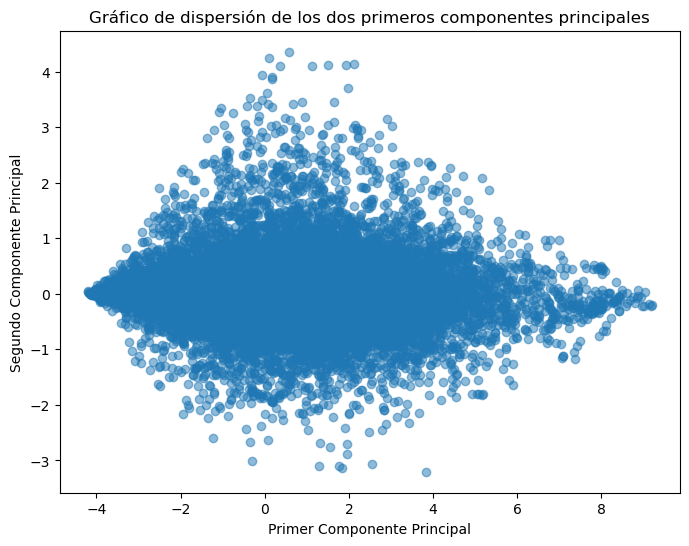

In [5]:
import matplotlib.pyplot as plt

# Extraer los dos primeros componentes principales
component1 = data_pca[:, 0]
component2 = data_pca[:, 1]

# Dibuja un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(component1, component2, alpha=0.5)
plt.title('Gráfico de dispersión de los dos primeros componentes principales')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()


# Version 2:

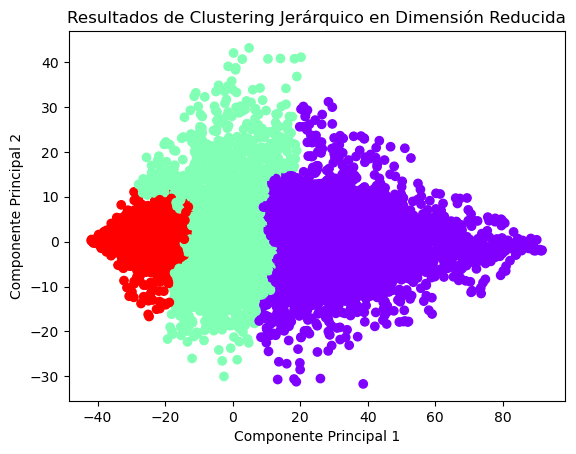

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Realizar la reducción de dimensionalidad con PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para la visualización
reduced_data = pca.fit_transform(data)

# Inicializar y entrenar el modelo de Agglomerative Hierarchical Clustering
num_clusters = 3  # Número de clústeres (ajustar según tus necesidades)
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(reduced_data)

# Visualizar los resultados del clustering
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de Clustering Jerárquico en Dimensión Reducida')
plt.show()


# Version 3

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar dataset_tissue.txt
data_path = '../db/dataset_tissue.txt'
data = pd.read_csv(data_path, sep=',', header=0, index_col=0)

# Cargar clase.txt
classes_path = '../db/clase.txt'
classes = pd.read_csv(classes_path, sep=',', header=0, index_col=0)

# Transponer los datos
data_transposed = data.transpose()

# Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_transposed),
                               columns=data_transposed.columns,
                               index=data_transposed.index)

# Aplicar PCA para retener el 95% de la varianza
pca_95 = PCA(n_components=0.95)
data_pca = pca_95.fit_transform(data_normalized)

print('Número de componentes principales: ', pca_95.n_components_)

Número de componentes principales:  101


In [7]:
import numpy as np
from scipy.stats import multivariate_normal
import sklearn

covariances = [np.eye(data_pca.shape[1]) for _ in range(pca_95.n_components_)]

#realizamos una limpieza exaustiva debido a errores presenados durante la copilacion

def clean_covariances(covariances, epsilon=1e-6):
    cleaned_covariances = covariances.copy()
    for i in range(len(covariances)):
        if np.any(np.isnan(covariances[i])) or np.any(np.isinf(covariances[i])):
            # Si algún valor en covariances[i] es NaN o inf, reemplaza toda la matriz por la matriz de identidad
            cleaned_covariances[i] = np.eye(covariances[i].shape[0]) * epsilon
    return cleaned_covariances

# Limpia las covarianzas
cleaned_covariances = clean_covariances(covariances)
means = data_pca[np.random.choice(data_pca.shape[0], pca_95.n_components_, replace=False), :]

def clean_means(means, epsilon=1e-6):
    cleaned_means = means.copy()
    for i in range(len(means)):
        if np.any(np.isnan(means[i])) or np.any(np.isinf(means[i])):
            # Si algún valor en means[i] es NaN o inf, reemplázalo por un pequeño valor epsilon
            cleaned_means[i] = np.ones_like(means[i]) * epsilon
    return cleaned_means
cleaned_means = clean_means(means)

# Coeficientes de mezcla
mixing_coeffs = np.ones(pca_95.n_components_ )/ pca_95.n_components_

def clean_mixing_coeffs(mixing_coeffs, epsilon=1e-6):
    cleaned_mixing_coeffs = mixing_coeffs.copy()
    if np.any(np.isnan(mixing_coeffs)) or np.any(np.isinf(mixing_coeffs)):
        # Si algún valor en mixing_coeffs es NaN o inf, reemplázalo por un valor uniforme
        cleaned_mixing_coeffs = np.ones_like(mixing_coeffs) / len(mixing_coeffs)
    return cleaned_mixing_coeffs
cleaned_mixing_coeffs = clean_mixing_coeffs(mixing_coeffs)

print("\nCleaned Covariances:\n", cleaned_covariances)




Cleaned Covariances:
 [array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[

In [8]:
explained_variance = np.var(data_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio_cumsum = np.cumsum(explained_variance_ratio)
num_components_95 = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
print(f"Número de componentes para obtener el 95% de la varianza: {num_components_95}")

Número de componentes para obtener el 95% de la varianza: 63


# DBSCAN
## library issue

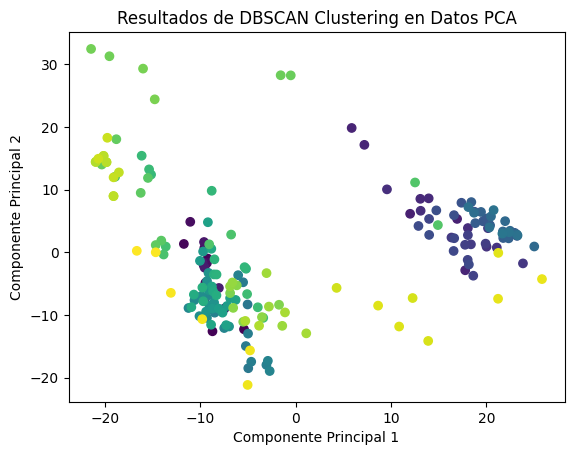

In [48]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Crear una instancia de DBSCAN
# Especifica el valor de epsilon (radio) y el número mínimo de muestras en un clúster
epsilon = 1e-3  # Ajusta este valor según tus necesidades
min_samples = 1  # Ajusta este valor según tus necesidades
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Aplicar DBSCAN a los datos
cluster_labels = dbscan.fit_predict(data_pca)

# Visualizar los resultados del clustering
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de DBSCAN Clustering en Datos PCA')
plt.show()



In [49]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Calcular el índice Davies-Bouldin
db_score = davies_bouldin_score(data_pca, cluster_labels)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(data_pca, cluster_labels)

# Calcular la puntuación Calinski-Harabasz
calinski_harabasz_score = calinski_harabasz_score(data_pca, cluster_labels)

print("Índice Davies-Bouldin:", db_score)
print("Coeficiente de Silueta Medio:", silhouette_avg)
print("Puntuación Calinski-Harabasz:", calinski_harabasz_score)


Índice Davies-Bouldin: 6.75114135312442e-08
Coeficiente de Silueta Medio: 0.04232804205870586
Puntuación Calinski-Harabasz: 5.560456835331864e+29


# DBSCAN

In [9]:
import numpy as np

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


In [10]:
def range_query(data, point, epsilon, distance_func):
    neighbors = []
    for i, data_point in enumerate(data):
        if distance_func(point, data_point) <= epsilon:
            neighbors.append(i)
    return neighbors

In [11]:
def dbscan(data, epsilon, min_samples, distance_func):
    labels = [None] * len(data)
    cluster_id = 0

    for i, point in enumerate(data):
        if labels[i] is not None:
            continue

        neighbors = range_query(data, point, epsilon, distance_func)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Marcar como ruido (punto no asignado a ningún clúster)
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples, distance_func)

    return labels

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_samples, distance_func):
    labels[point_index] = cluster_id

    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]

        if labels[neighbor_index] is None:
            labels[neighbor_index] = cluster_id
            neighbor_neighbors = range_query(data, data[neighbor_index], epsilon, distance_func)

            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)

        i += 1

In [16]:
# Ejemplo de uso
epsilon = 1e-6
min_samples = 2

cluster_labels = dbscan(data_pca, epsilon, min_samples, euclidean_distance)
print(cluster_labels)


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 2, 3, 4, 1, 3, 4, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


# Segunda version
### Necesita realizar pruebas

In [17]:
import numpy as np

def dbscan(data, epsilon, min_samples):
    # Inicializar las etiquetas de los puntos
    labels = np.zeros(len(data))
    cluster_id = 0
    
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        
        # Encontrar los vecinos dentro del radio de epsilon
        neighbors = find_neighbors(data, i, epsilon)
        
        if len(neighbors) < min_samples:
            labels[i] = -1  # Marcar como ruido
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples)
    
    return labels

def find_neighbors(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if np.linalg.norm(data[point_index] - data[i]) < epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_samples):
    labels[point_index] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]
        if labels[neighbor] == -1:
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            new_neighbors = find_neighbors(data, neighbor, epsilon)
            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors
        i += 1

# Implementación de DBSCAN (por hacer)

# Ajustar hiperparámetros según tus datos
epsilon = 0.5  # Radio de vecindad
min_samples = 5  # Número mínimo de puntos para formar un clúster

# Llamar a la función DBSCAN y obtener los clústeres
cluster_labels = dbscan(data_pca, epsilon, min_samples) 

# Visualizar los resultados de DBSCAN (por hacer)


# Implementacion de la visualizacion:

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Función para visualizar los resultados de DBSCAN
def visualize_dbscan(data_pca, labels):
    num_clusters = len(np.unique(labels))
    colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

    for cluster_id in range(num_clusters):
        plt.scatter(data_pca[labels == cluster_id, 0], data_pca[labels == cluster_id, 1], label=f'Cluster {cluster_id}', c=[colors[cluster_id]])

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Resultados de DBSCAN Clustering en Dimensión Reducida')
    plt.legend()
    plt.show()

# Aplicar DBSCAN al conjunto de datos reducido
cluster_labels = dbscan(data_pca, epsilon=0.5, min_samples=2)

# Visualizar los resultados de DBSCAN
visualize_dbscan(data_pca, cluster_labels)

TypeError: 'DBSCAN' object is not callable

# Evaluacion de la calidad con la metrica Sillhouette

In [22]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Evaluación del DBSCAN
# Suponiendo que ya se ha aplicado DBSCAN y se han obtenido las etiquetas de clústeres en 'dbscan_labels'
# También se asume que 'reduced_data' es el conjunto de datos reducido con PCA

# Índice Davies-Bouldin
davies_bouldin = davies_bouldin_score(data_pca, cluster_labels)
print("Índice Davies-Bouldin:", davies_bouldin)

# Coeficiente de Silueta Medio
silhouette_avg = silhouette_score(data_pca, cluster_labels)
print("Coeficiente de Silueta Medio:", silhouette_avg)

# Puntuación Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(data_pca, cluster_labels)
print("Puntuación Calinski-Harabasz:", calinski_harabasz)


Índice Davies-Bouldin: 0.7746207469359208
Coeficiente de Silueta Medio: 0.145520338884777
Puntuación Calinski-Harabasz: 3.2011327494930057


# Visualizacion de cada cluster

### Hecho como se pide en el proyecto, por sus etiquetas: